**Identifying characteristics of fake Instagram accounts**

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

**Load the dataset**

In [21]:
data = pd.read_csv("dataset_numeric.csv") 
data

,following,followers,username_length,full_name_length,description_length,username_has_number,full_name_has_number,description_has_number,is_fake
0,0.072647,0.113159,0.260870,0.333333,0.680000,0.0,0.0,1.0,0.0
1,0.000267,0.550153,0.347826,0.866667,0.306667,0.0,0.0,0.0,0.0
2,0.039456,0.040202,0.391304,0.433333,0.220000,0.0,0.0,0.0,0.0
3,0.074780,0.210061,0.391304,0.400000,0.473333,0.0,0.0,0.0,0.0
4,0.081445,0.041116,0.565217,0.500000,0.340000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
471,0.825913,0.000012,0.478261,0.000000,0.146667,1.0,0.0,0.0,1.0
472,0.144495,0.000005,0.347826,0.000000,0.506667,0.0,0.0,0.0,1.0
473,0.067982,0.000002,0.304348,0.300000,0.206667,1.0,0.0,1.0,1.0
474,0.109704,0.000006,0.391304,0.400000,0.086667,1.0,1.0,0.0,1.0


**Fake Accounts**

In [22]:
fake_rows = data[data['is_fake'] == 1]
fake_rows

,following,followers,username_length,full_name_length,description_length,username_has_number,full_name_has_number,description_has_number,is_fake
238,0.921221,0.000116,0.478261,0.733333,0.800000,0.0,0.0,0.0,1.0
239,0.068115,0.000005,0.304348,0.233333,0.126667,0.0,0.0,0.0,1.0
240,0.891229,0.000011,0.521739,0.466667,0.026667,1.0,1.0,0.0,1.0
241,0.414290,0.000006,0.391304,0.233333,0.486667,0.0,0.0,0.0,1.0
242,0.088243,0.000042,0.565217,0.200000,0.033333,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
471,0.825913,0.000012,0.478261,0.000000,0.146667,1.0,0.0,0.0,1.0
472,0.144495,0.000005,0.347826,0.000000,0.506667,0.0,0.0,0.0,1.0
473,0.067982,0.000002,0.304348,0.300000,0.206667,1.0,0.0,1.0,1.0
474,0.109704,0.000006,0.391304,0.400000,0.086667,1.0,1.0,0.0,1.0


**Real Accounts**

In [23]:
real_rows = data[data['is_fake'] == 0]
real_rows                 

,following,followers,username_length,full_name_length,description_length,username_has_number,full_name_has_number,description_has_number,is_fake
0,0.072647,0.113159,0.260870,0.333333,0.680000,0.0,0.0,1.0,0.0
1,0.000267,0.550153,0.347826,0.866667,0.306667,0.0,0.0,0.0,0.0
2,0.039456,0.040202,0.391304,0.433333,0.220000,0.0,0.0,0.0,0.0
3,0.074780,0.210061,0.391304,0.400000,0.473333,0.0,0.0,0.0,0.0
4,0.081445,0.041116,0.565217,0.500000,0.340000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
233,0.004665,0.043066,0.869565,0.600000,0.806667,0.0,0.0,0.0,0.0
234,0.005465,0.019918,0.086957,0.633333,0.506667,0.0,0.0,0.0,0.0
235,0.001600,0.029380,0.478261,0.366667,0.926667,0.0,0.0,0.0,0.0
236,0.044788,0.040620,0.347826,0.400000,0.993333,0.0,0.0,0.0,0.0


**Identifying the most important features in determining a fake or real instagram account using RFC**

In [25]:
features = data.iloc[:, :8]
target = data.iloc[:, 8]


In [31]:
# Split the data into training and testing sets
F_train, F_test, t_train, t_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=38)

# Train the classifier
rf_classifier.fit(F_train, t_train)

# Make predictions on the test set
t_pred = rf_classifier.predict(F_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(t_test, t_pred)
print(f"Accuracy: {accuracy:.2f}")

# Get feature importances from the trained model
feature_importances = rf_classifier.feature_importances_

feature_importance_data = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances})

feature_importance_data = feature_importance_data.sort_values(by='Importance', ascending=False)


print(feature_importance_data)



Accuracy: 1.00
                  Feature  Importance
1               followers    0.489474
0               following    0.210894
5     username_has_number    0.128464
3        full_name_length    0.077513
4      description_length    0.065856
2         username_length    0.017059
6    full_name_has_number    0.007210
7  description_has_number    0.003530


**Feature Importance table**

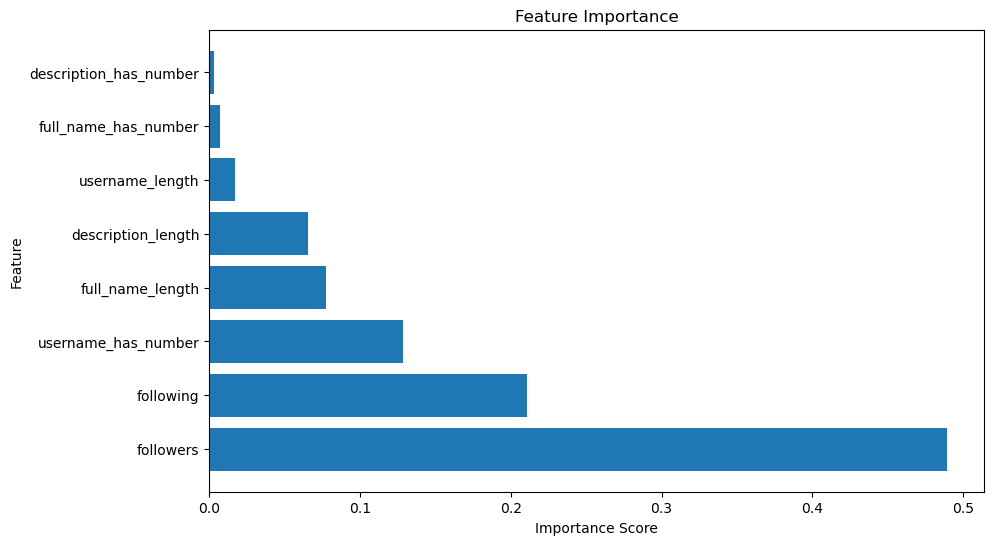

In [32]:

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_data['Feature'], feature_importance_data['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [33]:
real_accounts_stats = real_rows.describe()
fake_accounts_stats = fake_rows.describe()

In [34]:
real_accounts_stats

,following,followers,username_length,full_name_length,description_length,username_has_number,full_name_has_number,description_has_number,is_fake
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.0
mean,0.063858,0.087399,0.388381,0.485714,0.637563,0.025210,0.004202,0.226891,0.0
std,0.082568,0.134872,0.157168,0.206984,0.264340,0.157093,0.064820,0.419704,0.0
min,0.000000,0.012767,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.020195,0.020775,0.304348,0.366667,0.441667,0.000000,0.000000,0.000000,0.0
50%,0.051919,0.037166,0.347826,0.466667,0.650000,0.000000,0.000000,0.000000,0.0
75%,0.080479,0.079411,0.434783,0.600000,0.880000,0.000000,0.000000,0.000000,0.0
max,0.896428,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [35]:
fake_accounts_stats

,following,followers,username_length,full_name_length,description_length,username_has_number,full_name_has_number,description_has_number,is_fake
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.0
mean,0.410628,0.000094,0.389843,0.283894,0.369888,0.592437,0.088235,0.226891,1.0
std,0.277898,0.000214,0.146144,0.226962,0.298587,0.492417,0.284235,0.419704,0.0
min,0.024260,0.000000,0.086957,0.000000,0.013333,0.000000,0.000000,0.000000,1.0
25%,0.161457,0.000009,0.304348,0.133333,0.120000,0.000000,0.000000,0.000000,1.0
50%,0.364636,0.000014,0.347826,0.250000,0.286667,1.000000,0.000000,0.000000,1.0
75%,0.606238,0.000103,0.478261,0.400000,0.596667,1.000000,0.000000,0.000000,1.0
max,1.000000,0.002073,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


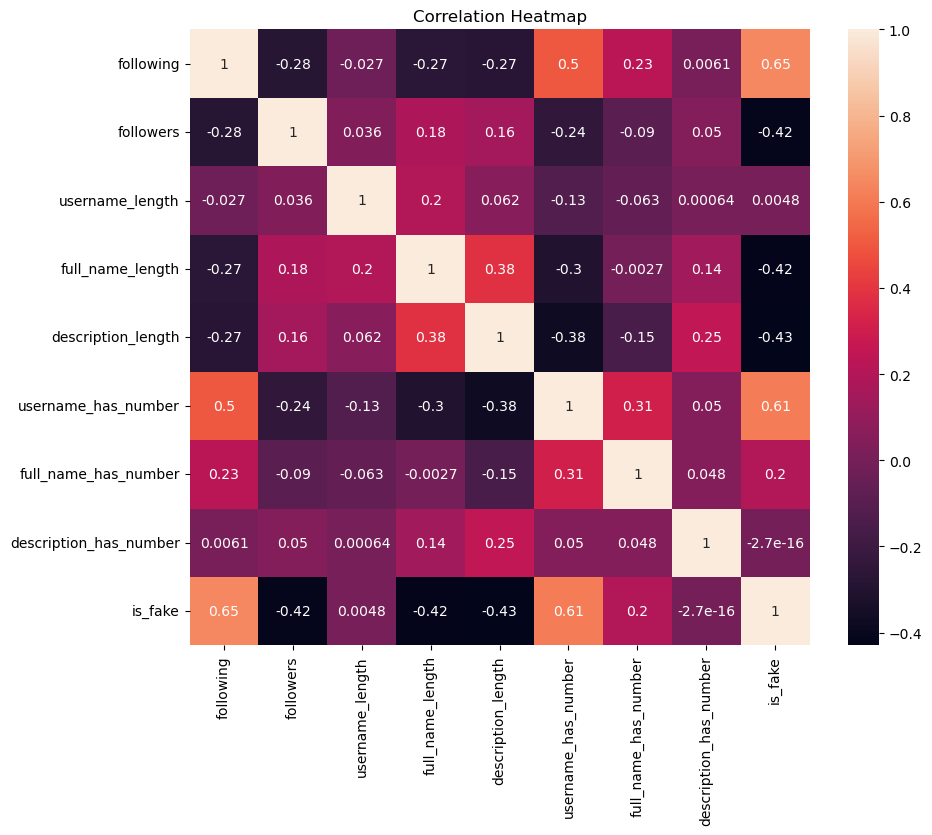

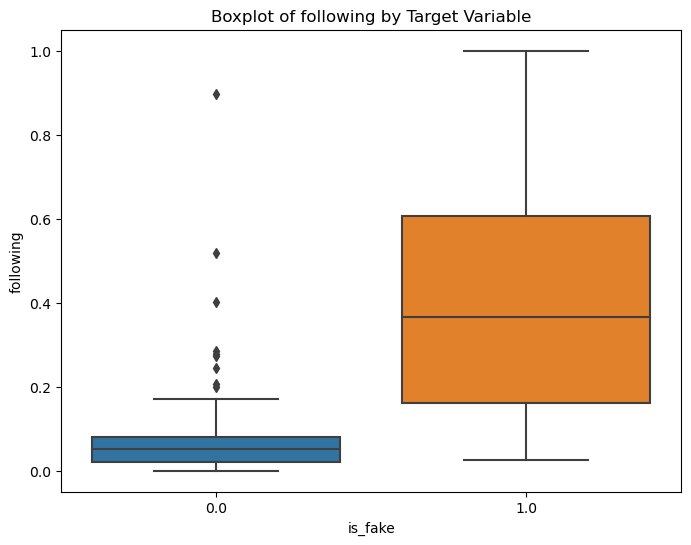

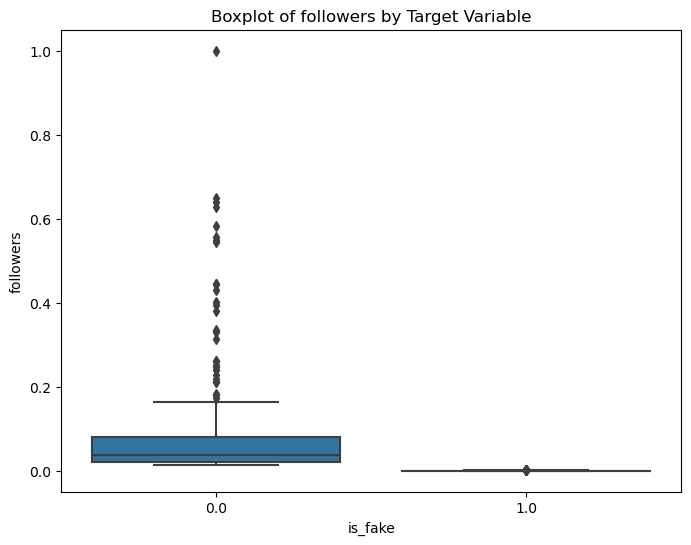

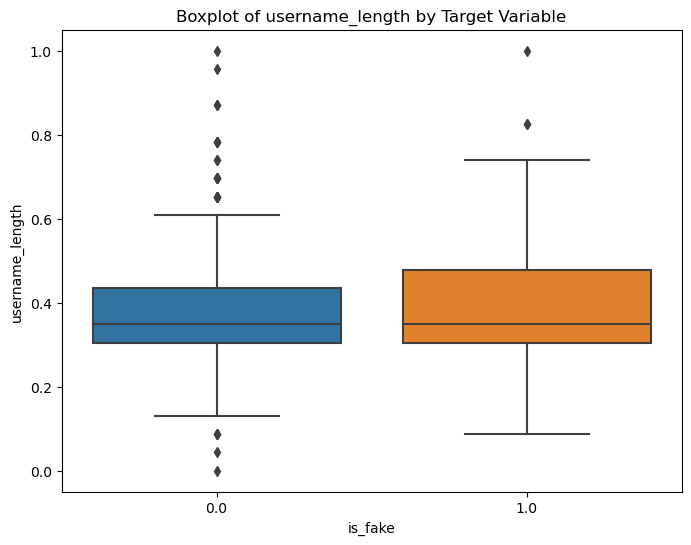

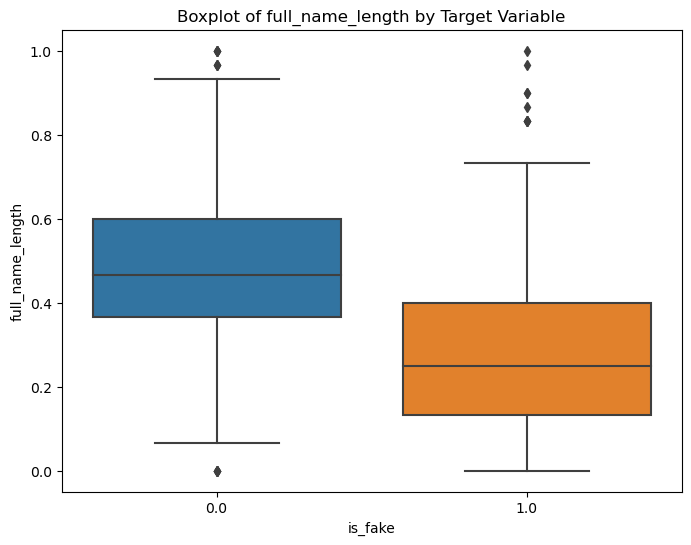

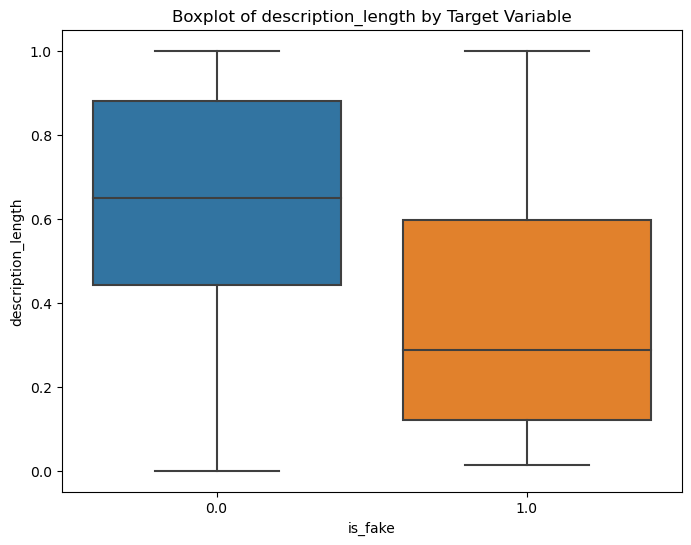

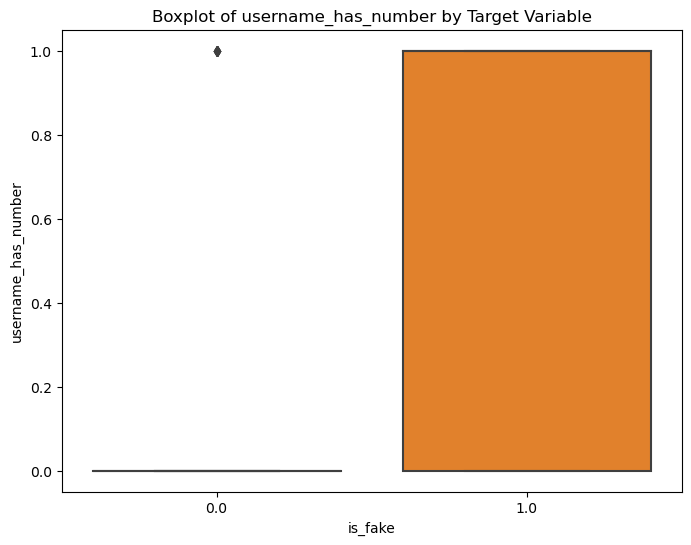

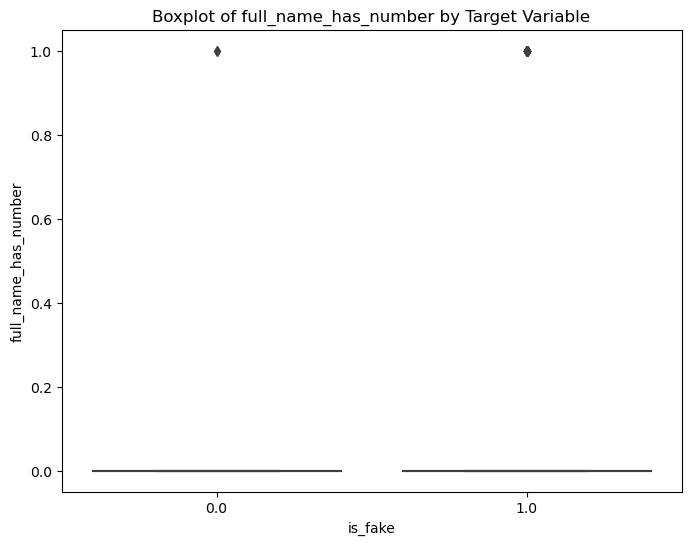

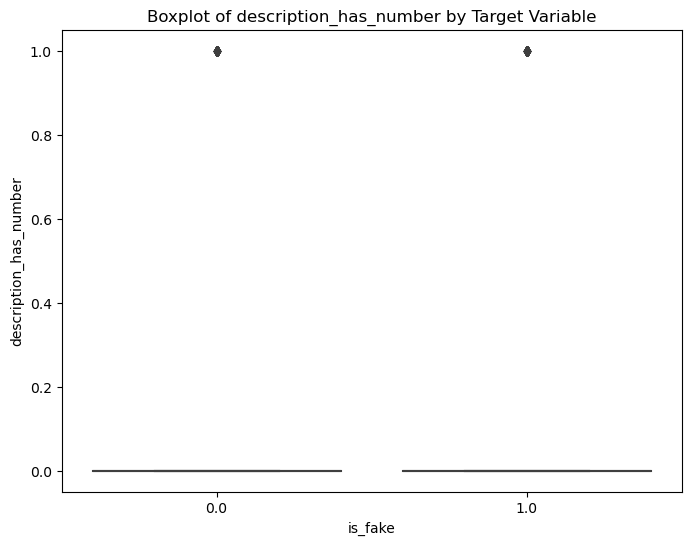

In [45]:

df = pd.concat([features, target], axis=1)


# Correlation heatmap
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Heatmap")
plt.show()


# Boxplots 
for column in features.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x="is_fake", y=column, data=df)
    plt.title(f"Boxplot of {column} by Target Variable")
    plt.show()

**T-test**

In [55]:
t_test_results = {}
for column in features.columns:
    fake_values = features.loc[target == 1, column]
    real_values = features.loc[target == 0, column]
    t_stat, p_value = ttest_ind(fake_values, real_values, equal_var=False)
    t_test_results[column] = {'t-statistic': t_stat, 'p-value': p_value}
    


for feature, result in t_test_results.items():
    print(f"{feature}: t-statistic={result['t-statistic']}, p-value={result['p-value']}")

following: t-statistic=18.453287907542954, p-value=3.1858559036427656e-50
followers: t-statistic=-9.98634017081548, p-value=7.931466013646228e-20
username_length: t-statistic=0.10505401197933693, p-value=0.9163776240166918
full_name_length: t-statistic=-10.136172164151334, p-value=5.716761392325306e-22
description_length: t-statistic=-10.355166596617703, p-value=9.245416046771176e-23
username_has_number: t-statistic=16.930341763465744, p-value=5.742618230748416e-45
full_name_has_number: t-statistic=4.446877376091847, p-value=1.2889871606376378e-05
description_has_number: t-statistic=0.0, p-value=1.0


Following: reject null hypothesis, so significant difference

Followers: reject null hypothesis, so significant difference

username_length: not reject null hypthesis, no evidence

full_name_length: reject null hypothesis, significant difference

description_length: reject null hypothesis, so significant difference

username_has_number: reject null hypothesis, so significant difference

full_name_has_number: reject null hypothesis, so significant difference

description_has_number: not reject null hypthesis, no evidence